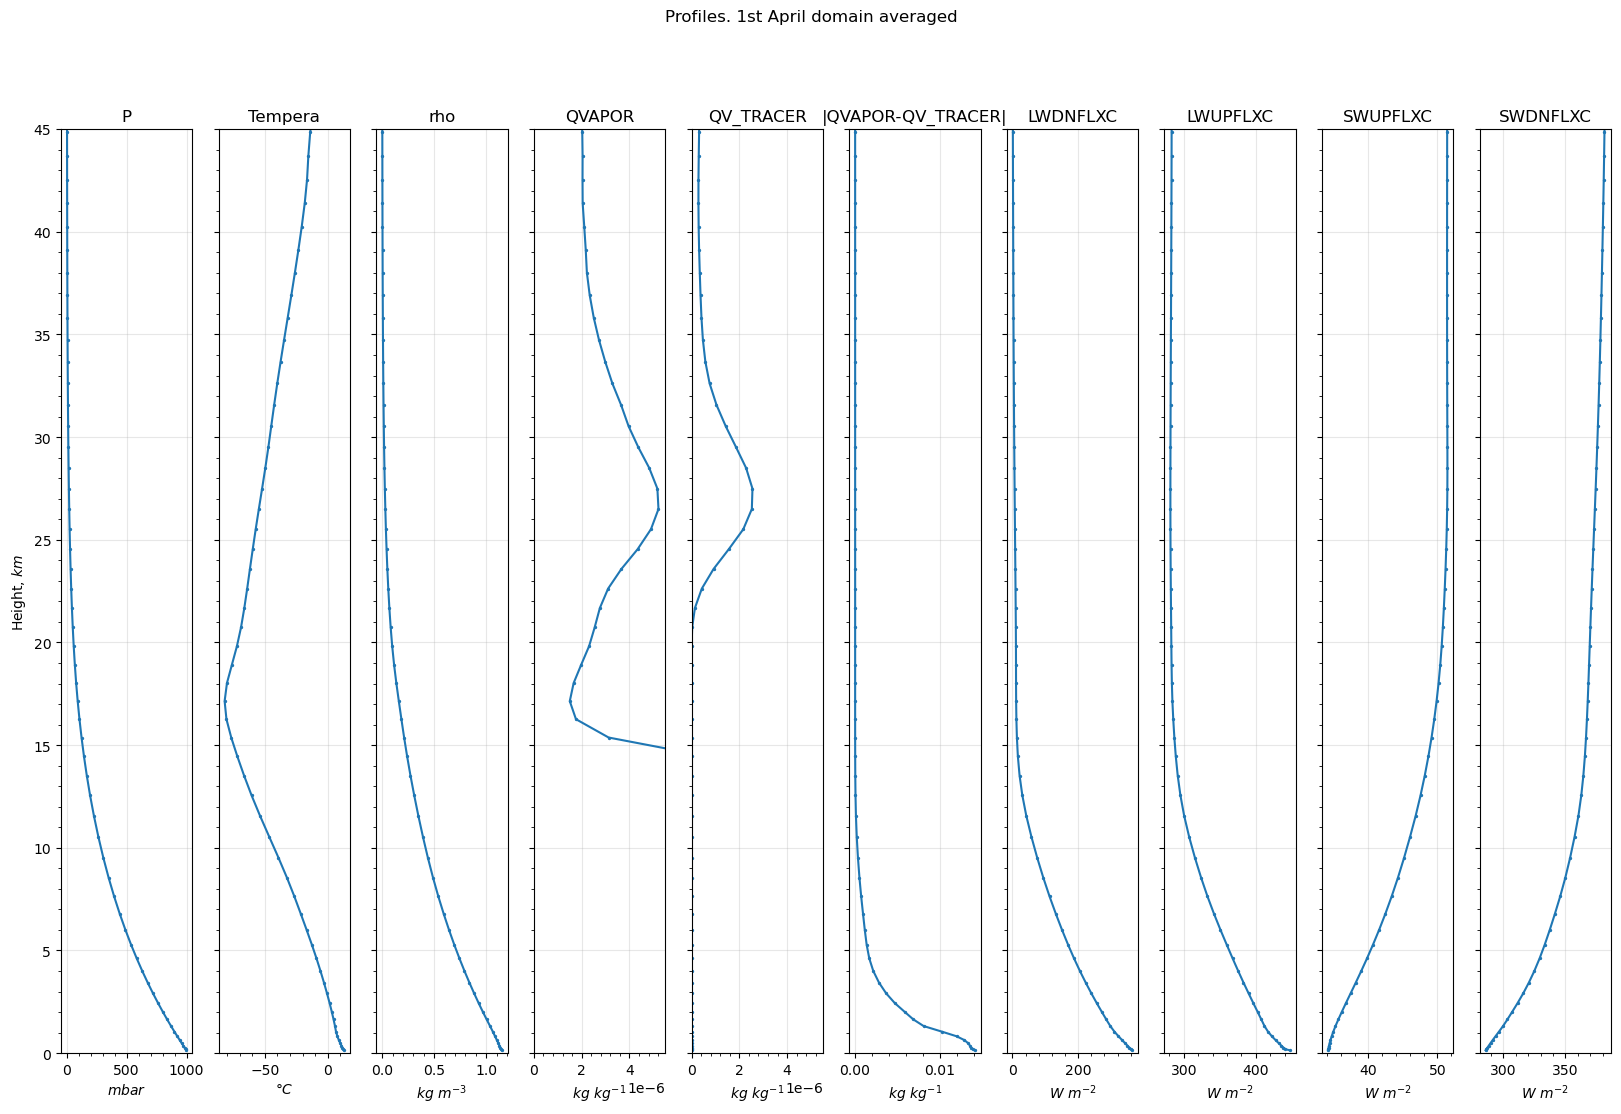

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

'''
The profiles provided by Alex Ukhov for the WRF-Chem simulation of Tonga.
'''

#all_columns=['Z_mass','Z_w','P','Tempera','rho','QVAPOR','QV_TRACER','LWDNFLXC','LWUPFLXC', "SWUPFLXC",'SWDNFLXC']
columns=['P','Tempera','rho','QVAPOR','QV_TRACER','|QVAPOR-QV_TRACER|','LWDNFLXC','LWUPFLXC', "SWUPFLXC",'SWDNFLXC',]
units={'P':'mbar','Tempera':'\degree C','rho':'kg\ m^{-3}','QVAPOR':'kg\ kg^{-1}','QV_TRACER':'kg\ kg^{-1}','|QVAPOR-QV_TRACER|':'kg\ kg^{-1}','LWDNFLXC':'W\ m^{-2}','LWUPFLXC':'W\ m^{-2}', "SWUPFLXC":'W\ m^{-2}','SWDNFLXC':'W\ m^{-2}'}

df=pd.read_pickle("/Users/osipovs/Data/Tonga/wrf_sim_input_profiles/computed_inst_rad_profile_pert.pckl")
df['|QVAPOR-QV_TRACER|']=np.abs(df['QVAPOR']-df["QV_TRACER"])
Z=df['Z_mass']
df=df.set_index('Z_mass')

#print (df)
only_once=True

fig, ax = plt.subplots(nrows=1,ncols=len(columns),figsize=(20,12),sharey=True)
fig.suptitle('Profiles. 1st April domain averaged')
for i,name in enumerate(columns):
    ax[i].plot(df[name],Z,'-o',markersize=1.4)

    ax[i].grid(True,alpha=0.3)

    ax[i].get_yaxis().set_minor_locator(AutoMinorLocator(5))
    ax[i].get_xaxis().set_minor_locator(AutoMinorLocator(5))

    if only_once:
        ax[i].set_ylabel('Height, $km$')
        only_once = False

    ax[i].set_xlabel(f'${units.get(name)}$', fontweight='bold')
    ax[i].set_ylim(ymin=0,ymax=45)

    if name in['QVAPOR','QV_TRACER']:
        ax[i].set_xlim(xmin=0,xmax=5.5e-6)

    #ax[i].legend(loc="upper left")
    ax[i].set_title(name,fontsize=12)

# plt.show()

In [3]:
df

,Z_w,P,Tempera,rho,QVAPOR,QV_TRACER,LWDNFLXC,LWUPFLXC,SWUPFLXC,SWDNFLXC,...,so4_a08,water_a01,water_a02,water_a03,water_a04,water_a05,water_a06,water_a07,water_a08,|QVAPOR-QV_TRACER|
Z_mass,,,,,,,,,,,,,,,,,,,,,
0.134771,0.108746,998.220886,12.909323,1.149457,0.014122,5.260156e-13,364.128815,447.032623,34.140167,285.738190,...,1.154997e-06,2.703337e-10,2.410959e-10,1.302103e-09,5.002057e-09,2.702152e-09,1.297441e-09,5.449038e-10,3.171575e-10,0.014122
0.194024,0.160796,991.466675,12.313819,1.144482,0.013880,6.673576e-13,360.336182,440.977936,34.170212,286.385132,...,1.162712e-06,2.749947e-10,2.457134e-10,1.327026e-09,5.103707e-09,2.767425e-09,1.310583e-09,5.650644e-10,3.414038e-10,0.013880
0.269490,0.227253,982.911987,11.659572,1.137474,0.013734,7.585748e-13,355.685760,438.276520,34.214603,287.214447,...,1.169915e-06,2.893375e-10,2.528243e-10,1.343312e-09,5.248991e-09,2.849219e-09,1.349559e-09,5.829438e-10,3.624344e-10,0.013734
0.365093,0.311728,972.151428,10.861124,1.128465,0.013580,8.490561e-13,349.873962,435.308105,34.278423,288.283173,...,1.179573e-06,2.994316e-10,2.618473e-10,1.393577e-09,5.428147e-09,2.960257e-09,1.421885e-09,6.194846e-10,4.021663e-10,0.013580
0.485369,0.418458,958.739380,9.890170,1.117124,0.013357,9.376269e-13,342.551086,431.684204,34.368820,289.661072,...,1.181135e-06,3.039662e-10,2.790664e-10,1.410211e-09,5.232204e-09,2.904635e-09,1.428206e-09,6.412204e-10,4.309930e-10,0.013357
0.635388,0.552279,942.204956,8.777903,1.102990,0.012919,1.027875e-12,333.465149,427.273315,34.495186,291.432770,...,1.203584e-06,3.155117e-10,3.019262e-10,1.427292e-09,4.611231e-09,2.309064e-09,1.298565e-09,6.425630e-10,4.319869e-10,0.012919
0.820547,0.718496,922.097717,7.593350,1.085664,0.011995,1.125462e-12,322.516388,422.157745,34.669392,293.690247,...,1.348646e-06,3.439070e-10,4.000415e-10,1.519392e-09,3.993511e-09,1.920203e-09,1.113782e-09,6.237927e-10,5.167508e-10,0.011995
1.046240,0.922597,898.052795,6.527773,1.064437,0.010260,1.245301e-12,310.140503,416.766785,34.906555,296.492615,...,1.892689e-06,5.077431e-10,7.357235e-10,1.921282e-09,4.447711e-09,2.295347e-09,1.168112e-09,7.511770e-10,7.441148e-10,0.010260
1.317546,1.169882,869.850586,5.730867,1.037689,0.008106,1.379244e-12,297.676147,411.905792,35.224464,299.778046,...,2.510105e-06,7.557588e-10,1.176952e-09,2.384317e-09,5.126724e-09,2.495694e-09,1.155075e-09,7.933403e-10,9.906826e-10,0.008106
